# EDA - #21 Worli - MPCB

In [1]:
# Importing dependenciers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import missingno as msno

C:\Users\mubar_dyaglyf\OneDrive\Documents\Brocamp\Week_15\Data_sicence\practice\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Reading the dataset
path = 'downloads/semi_cleaned_files/group_3/WorliMumbaiMPCB.csv'
worli_df = pd.read_csv(path, index_col=0)

worli_df.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,Benzene,Toluene,Eth-Benzene,MP-Xylene,RH,WS,WD,BP,AT,TOT-RF
0,2021-01-01 00:00:00,2021-01-01 00:15:00,153.0,208.31,7.60,34.82,42.42,20.51,18.20,0.90,...,0.00,NaN,6.84,31.01,86.38,0.56,230.78,NaN,23.67,0.0
1,2021-01-01 00:15:00,2021-01-01 00:30:00,153.0,212.00,7.94,34.18,42.12,19.82,18.01,0.89,...,0.06,NaN,39.88,3.72,86.83,0.69,255.87,NaN,23.65,0.0
2,2021-01-01 00:30:00,2021-01-01 00:45:00,153.0,212.00,7.75,30.37,38.12,19.88,18.21,0.89,...,2.75,NaN,33.42,109.14,86.86,0.90,259.70,NaN,23.60,0.0
3,2021-01-01 00:45:00,2021-01-01 01:00:00,NaN,212.00,7.63,28.81,36.45,20.10,18.16,0.88,...,0.00,NaN,0.42,36.88,86.85,0.58,257.98,NaN,23.50,0.0
4,2021-01-01 01:00:00,2021-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3]:
worli_df.columns

Index(['From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene',
       'RH', 'WS', 'WD', 'BP', 'AT', 'TOT-RF'],
      dtype='object')

The features present in the dataset are:

* Date
* Particulate Matter less than 2.5 micron size
* Particulate Matter less than 10 Micron size
* Nitric Oxide
* Nitrogen dioxied
* Oxides of Nitrogen
* Ammonia
* Sulphur Dioxide
* Carbon Monoxide
* Ozone,Ozone
* Benzene
* Toluene
* Ethyl Benzene
* M+P Xylene
* Relative Humidity
* Wind Speed
* Wind Direcction
* Barometric Pressure
* Ambient Temperature
* TOT-Rain Fall

In [4]:
worli_df.shape

(76321, 21)

### Statistical Summary of Parameters

In [5]:
worli_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,65413.0,47.998834,36.327932,0.02,18.00,39.000,70.00,340.00
PM10,51456.0,102.975071,67.319220,4.00,52.00,87.000,141.00,985.00
NO,54105.0,59.075482,81.152845,0.01,8.65,19.460,85.38,499.89
NO2,46521.0,16.836007,16.966657,0.01,4.58,12.040,23.23,221.00
NOx,57549.0,67.977576,78.044491,0.00,18.45,37.550,91.80,499.92
NH3,44030.0,32.275530,61.639563,0.01,5.53,11.460,20.29,498.59
SO2,52408.0,19.560937,11.458251,0.01,11.01,19.170,25.68,182.56
CO,53762.0,0.922339,0.581743,0.00,0.47,0.970,1.32,6.55
Ozone,53051.0,3.498666,4.055015,0.01,2.16,3.950,4.13,183.82
Benzene,62376.0,0.736357,1.371582,0.00,0.00,0.000,0.98,26.11


* Toluene Column is full of NaN values
* Outliers are present in most of the columns
* Value of TOT-RF is zero for every columns

In [6]:
# Dropping form date column
worli_df = worli_df.drop('From Date', axis=1)

# Reaname data column
worli_df.rename(columns={'To Date': 'Date'}, inplace = True)
worli_df.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,RH,WS,WD,BP,AT,TOT-RF
0,2021-01-01 00:15:00,153.0,208.31,7.60,34.82,42.42,20.51,18.20,0.90,0.87,0.00,NaN,6.84,31.01,86.38,0.56,230.78,NaN,23.67,0.0
1,2021-01-01 00:30:00,153.0,212.00,7.94,34.18,42.12,19.82,18.01,0.89,0.80,0.06,NaN,39.88,3.72,86.83,0.69,255.87,NaN,23.65,0.0
2,2021-01-01 00:45:00,153.0,212.00,7.75,30.37,38.12,19.88,18.21,0.89,0.94,2.75,NaN,33.42,109.14,86.86,0.90,259.70,NaN,23.60,0.0
3,2021-01-01 01:00:00,NaN,212.00,7.63,28.81,36.45,20.10,18.16,0.88,0.95,0.00,NaN,0.42,36.88,86.85,0.58,257.98,NaN,23.50,0.0
4,2021-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Missing Values

In [7]:
# Checking for missing values
worli_df.isnull().sum()*100/len(worli_df)

Date             0.000000
PM2.5           14.292266
PM10            32.579500
NO              29.108633
NO2             39.045610
NOx             24.596114
NH3             42.309456
SO2             31.332137
CO              29.558051
Ozone           30.489642
Benzene         18.271511
Toluene        100.000000
Eth-Benzene     51.635854
MP-Xylene       58.899910
RH              26.697763
WS              26.706935
WD              26.661076
BP              76.668283
AT              26.801274
TOT-RF           0.000000
dtype: float64

* 100% Values are missing for Toluene
* Barometric Measure doesn't have more than 3/4 values
* MP-Xylene and Ethyle Benzene have missing values more than 50%
* Around 30% values are missing from other parameters
* PM2.5 misses 14.3% values wile TOT-Rain Fall contains all the values

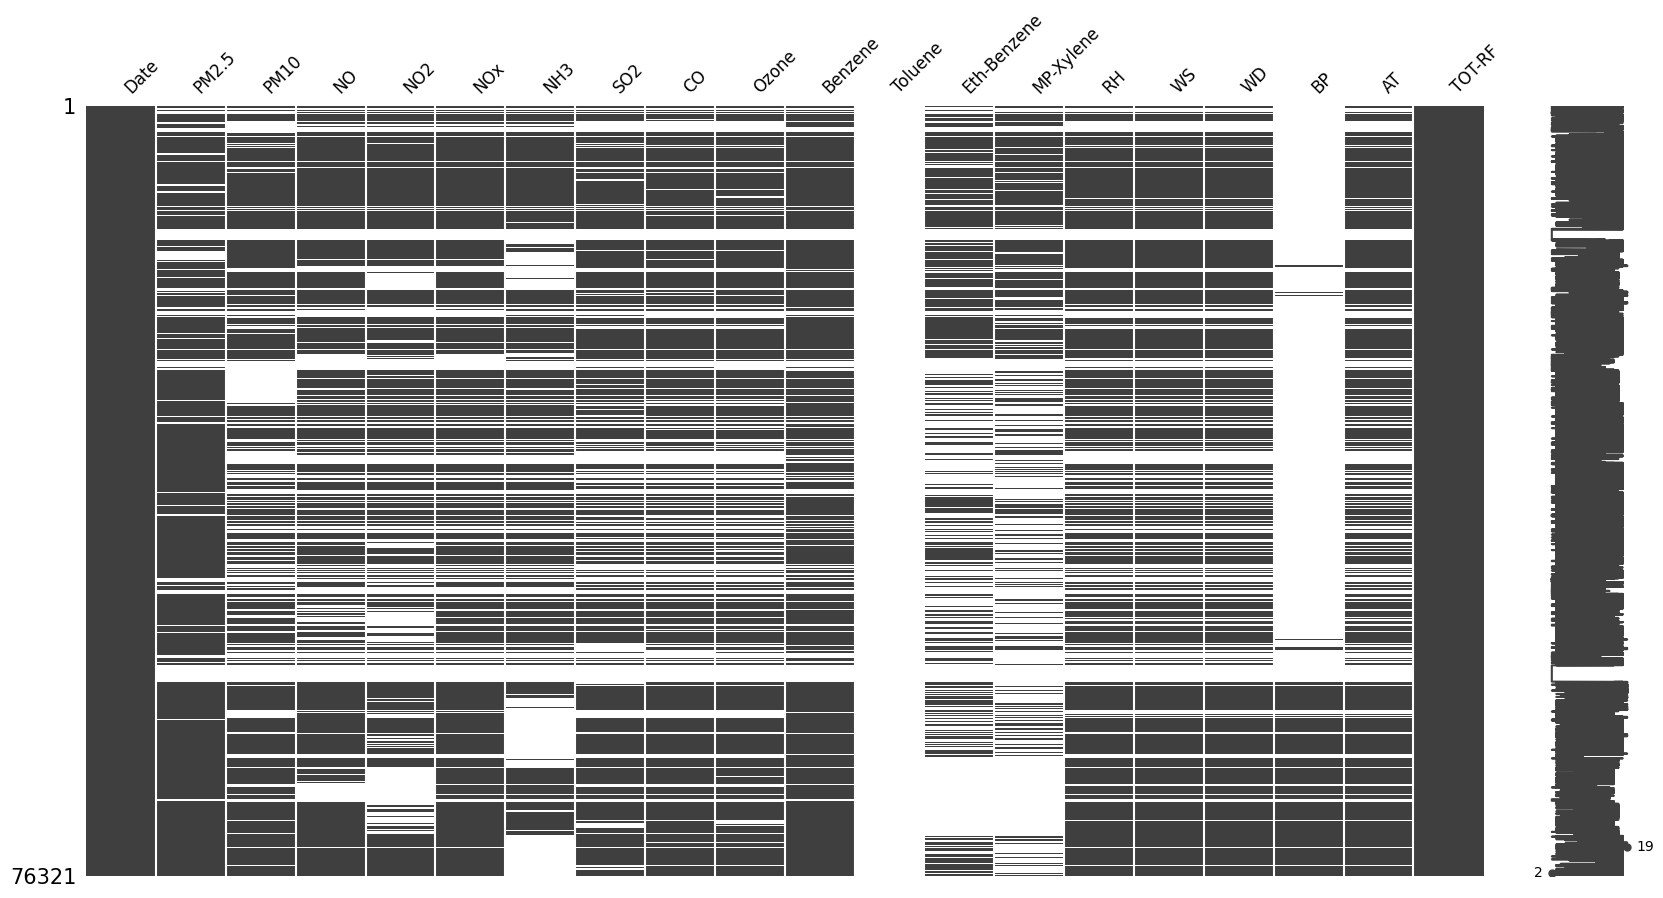

In [8]:
# Visualising missing values
msno.matrix(worli_df, figsize=(20,10), fontsize=12)
plt.show()

* Looks like there are some observations which didn't record any of the params otherthan TOT-RF

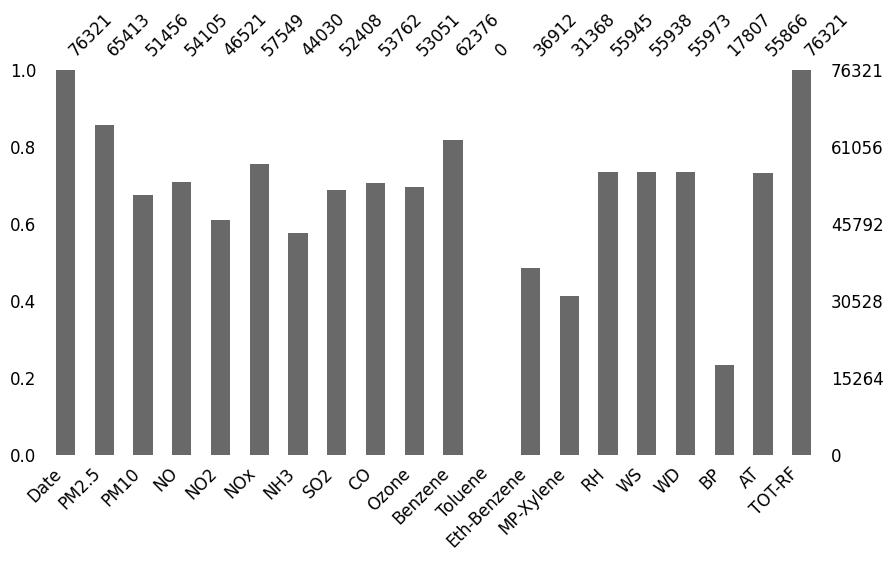

In [9]:
msno.bar(worli_df, figsize=(10,5), fontsize=12);

<AxesSubplot: >

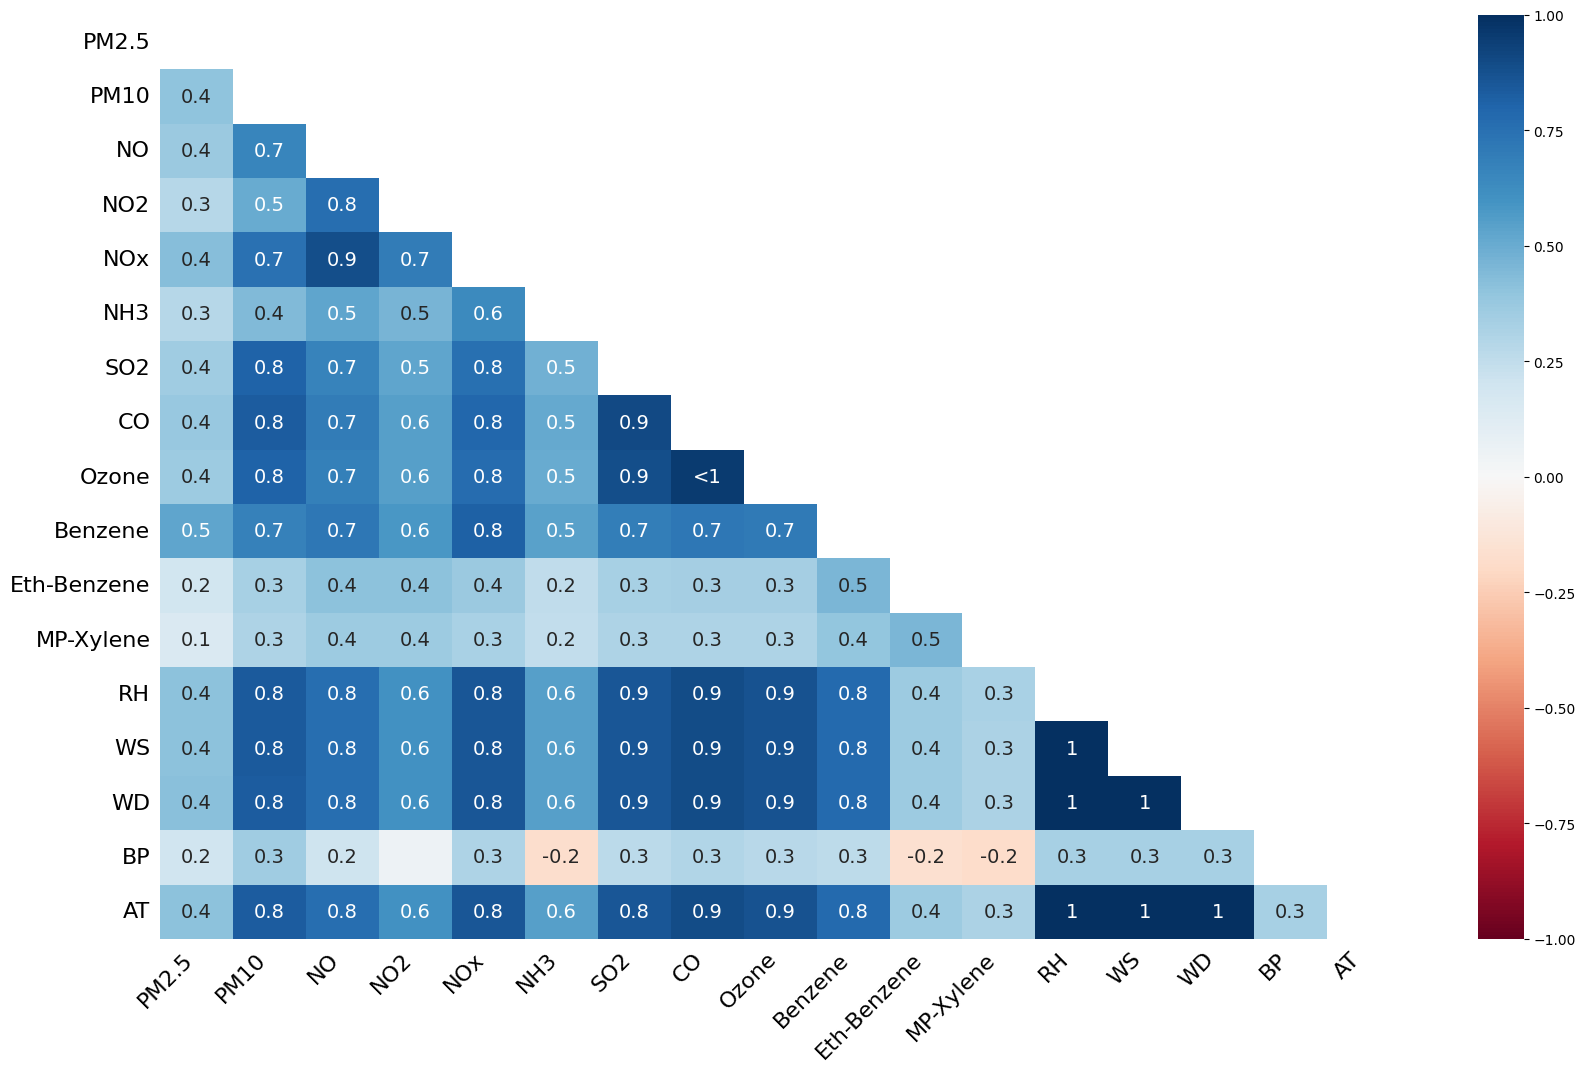

In [10]:
# Missing data heatmap
msno.heatmap(worli_df)

* -1 - Exact Negative correlation represents that if the value of one variable is present then the value of other variables is definitely absent.
* 0 - No correlation represents that variables' values present or absent do not have any effect on one another.
* 1 - Exact Positive correlation represents that if the value of one variable is present then the value of the other is definitely present.

Relative Humidiy, Wind speed, Wind Direction and Ambient Temperature have Strong postive correlation.

SO2, CO2 and AT shows strong correlation for missing values

In [70]:
temp_df = worli_df.copy()
temp_df.set_index('Date', inplace=True)

params = temp_df.columns[:-1]

nan_mask = temp_df[params].isna()

# use the all() method to identify rows where all cells are NaN
all_nan_rows = nan_mask.all(axis=1)

# print the rows where all cells are NaN
missing_records = temp_df[params][all_nan_rows]

print(missing_records.shape[0], "rows didn't record any params")
missing_records.head()

7355 rows didn't record any params


,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,RH,WS,WD,BP,AT
Date,,,,,,,,,,,,,,,,,,
2021-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Distribution of Params

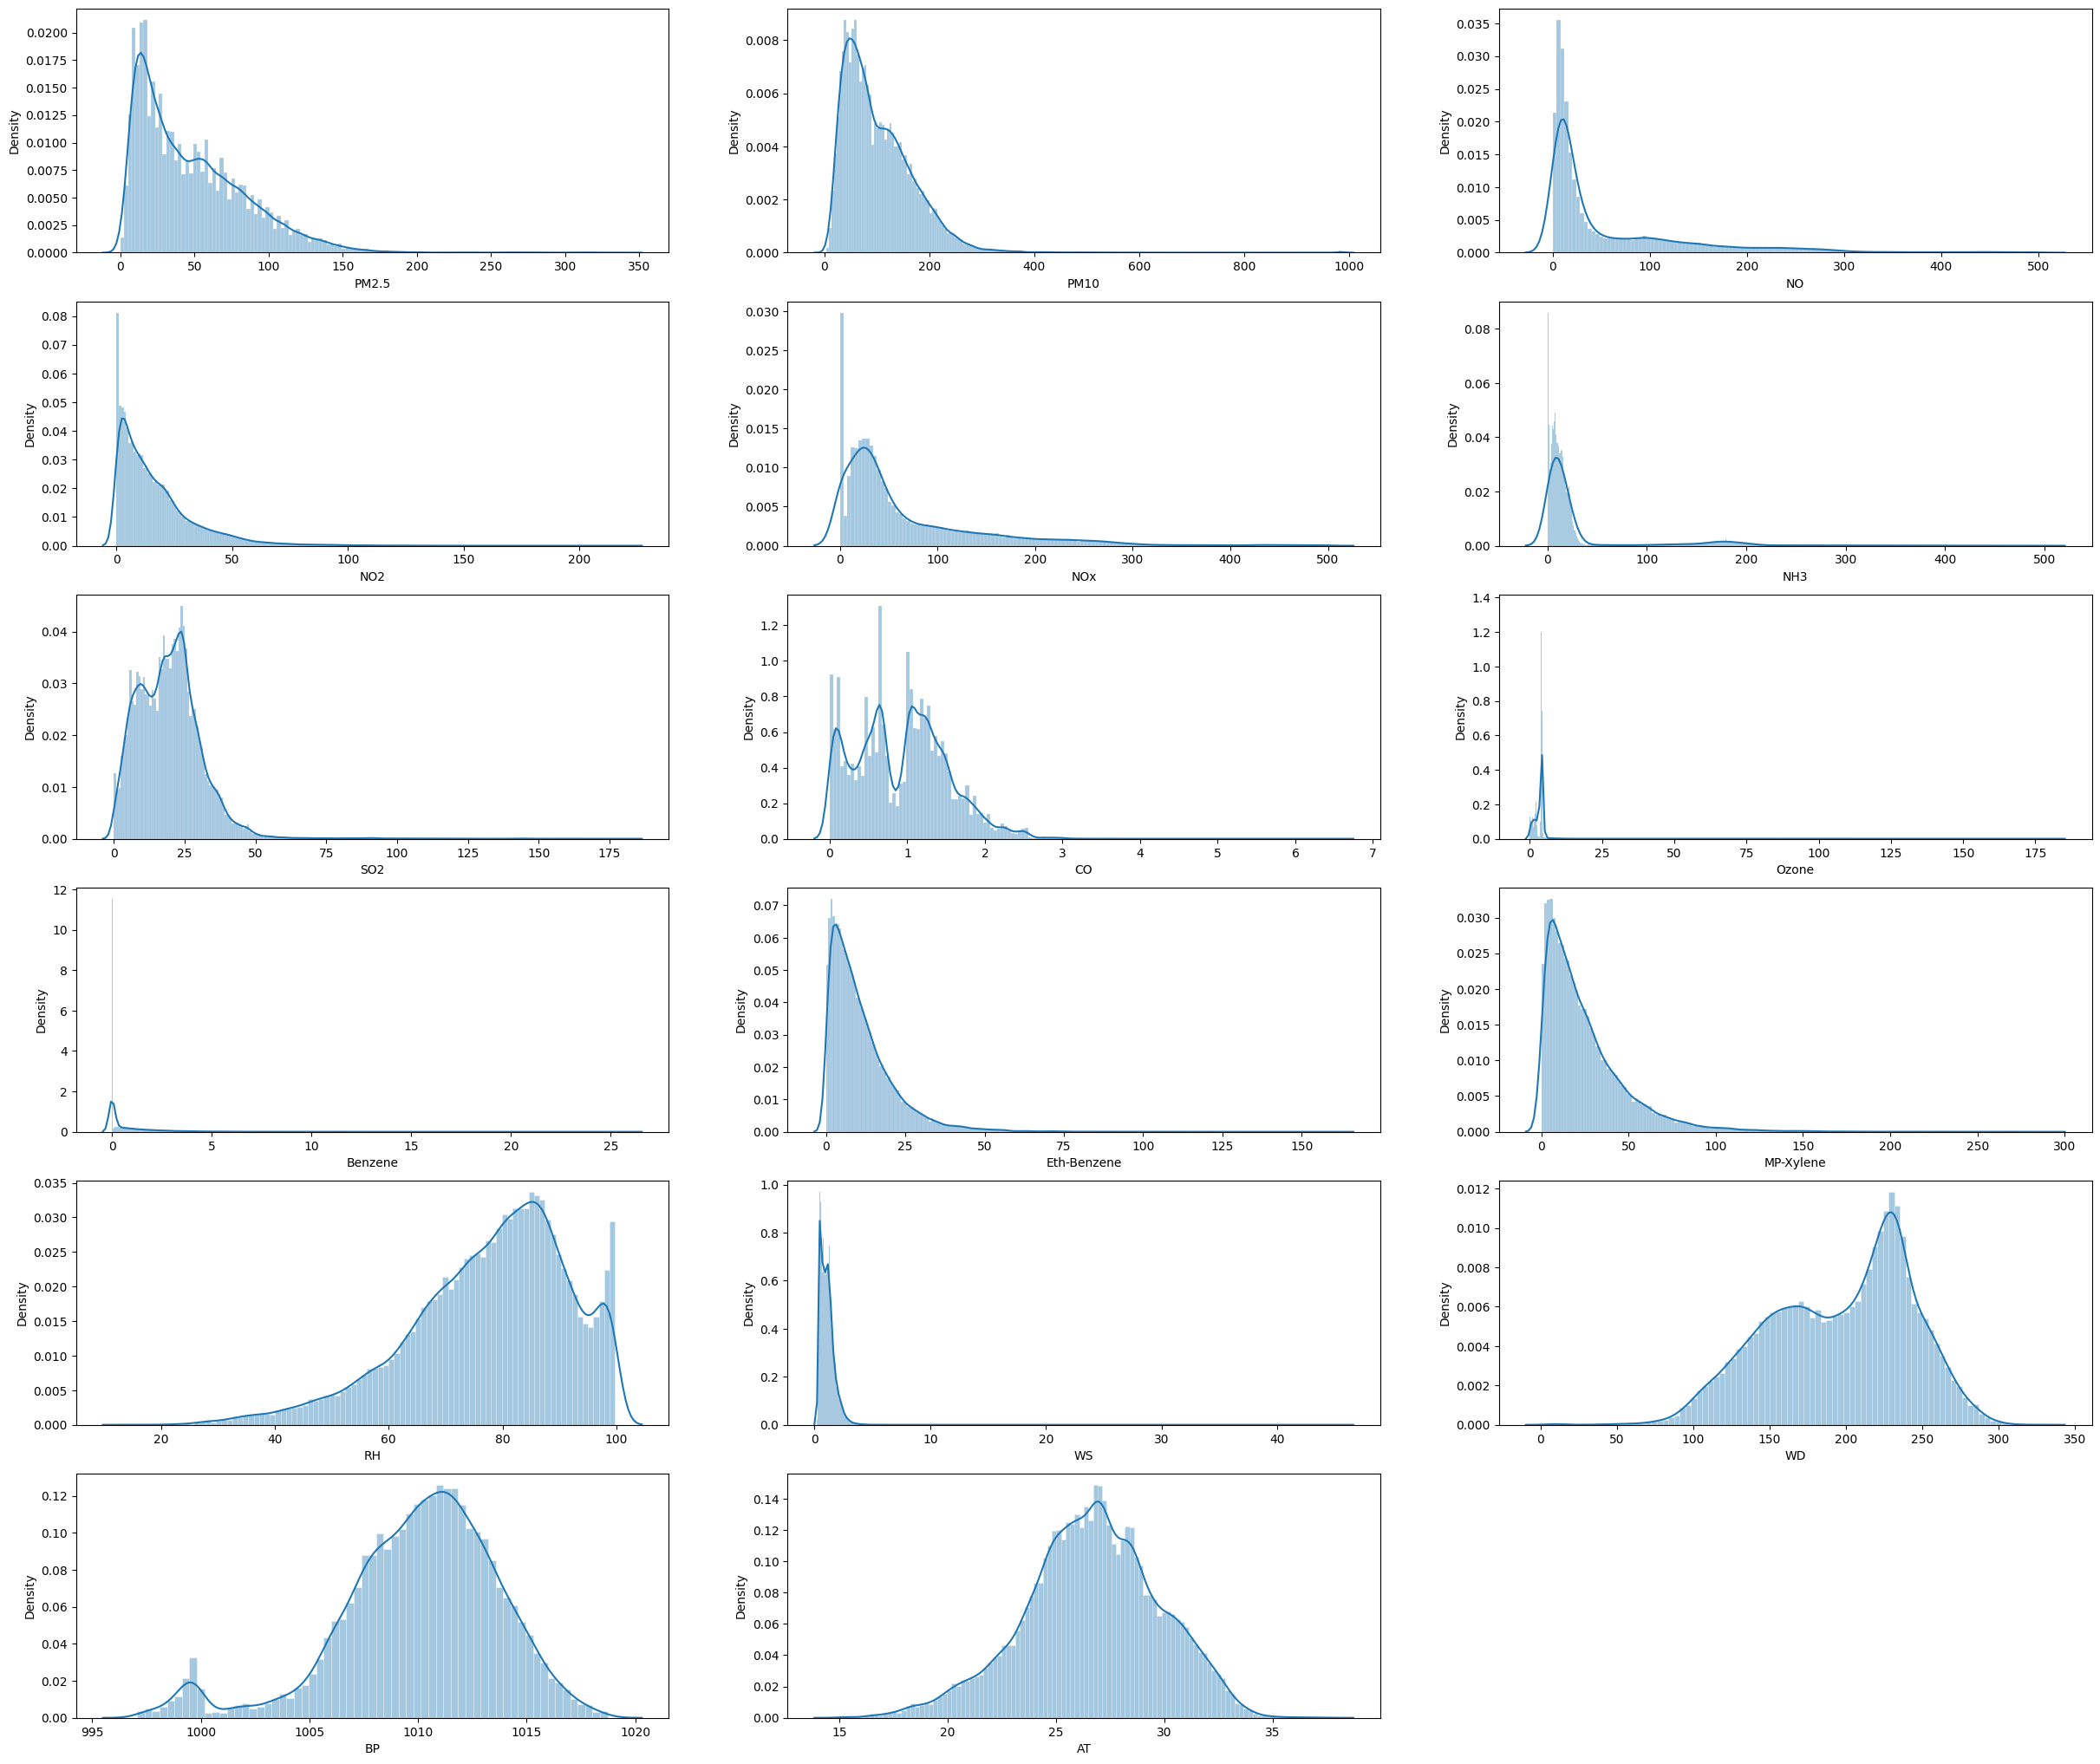

In [11]:
plt.figure(figsize=(30, 30))
temp_df = worli_df.drop(['Toluene', 'TOT-RF'], axis=1)
for idx, col in enumerate(temp_df.columns[1:], 1):
    plt.subplot(7, 3, idx)
    sns.histplot(temp_df[col], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)

* Most of the params show right skewed distribution - outliers - AQI Spikes
* Ambiesnt Temperature follows normal distribution
* Most of the values in Benzene seems to be 0

In [90]:
# Number of values = 0
print('Benzene:', worli_df['Benzene'].value_counts()[0])

Benzene: 35154


In [41]:
print('Nitrogen Oxides:', worli_df['NOx'].value_counts()[0])

5169


In [91]:
print('Carbon Monoxide', worli_df['CO'].value_counts()[0])

Carbon Monoxide 1053


### Plotting Averaeg pollutants over time

#### 1. Particulate Matter 2.5 microgram/cubic meter